# 损失函数

本脚本描述了用于回归和分类的多种不同的损失函数。

老规矩

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

/home/zhangxin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### 创建计算图会话

In [3]:
sess = tf.Session()

## 数值预测

---------------------------------

开始我们获得损失函数，我们开始看下数值损失函数。为了描述损失函数，我们必须围绕一个目标来创建一个预测序列。对于本联系，我们希望目标是变为0。

In [4]:
# 多种预测X值
x_vals = tf.linspace(-1., 1., 500)

# 创建我们的目标0
target = tf.constant(0.)

### L2损失

L2损失是最常见的回归损失函数之一。这里我们展示如何在TensorFlow中创建L2损失，并且我们运算它来画图。

In [5]:
# L2损失
# L = (pred - actual)^2
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)

### L1损失

另外一个可选的损失函数是L1损失。L1损失与L2损失类似。而L1损失是绝对值，而L2损失是平方值。

In [6]:
# L1损失
# L = abs(pred - actual)
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

### 伪Huber损失

伪huber损失函数是对L1损失函数平滑估计。当预测值接近目标值时，伪huber损失函数接近L2损失函数。

$$
L = \delta^2 \left( \sqrt {1 + \left(\frac{pred - actual}{\delta} \right)^2} - 1\right)
$$

In [7]:
# L = delta^2 * (sqrt(1 + ((pred - actual)/delta)^2) - 1)

# 伪huber损失，delta=0.25
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals)/delta1)) - 1.)
phuber1_y_out = sess.run(phuber1_y_vals)

# 伪huber损失，delta=5
delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals)/delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)

### 画出回归损失函数

这里我们使用matplotlib来画L1、L2和伪Huber损失函数。

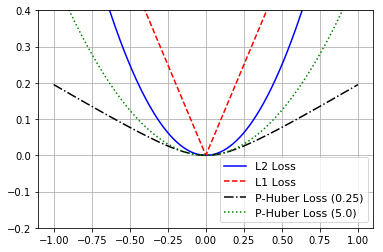

In [8]:
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-.', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.grid()
plt.show()

## 种类预测

-------------------------------

我们现在考虑分类损失函数。这里，预测值需要达到1的目标。|

In [9]:
# 多种预测的X值
x_vals = tf.linspace(-3., 5., 500)

# 目标是1.0
target = tf.constant(1.)
targets = tf.fill([500,], 1.)

### Hinge损失

hinge损失多用于种类预测。这里是`max(0, 1-(pred*actual))`.

$$
\max (0, 1 - (pred*acutal))
$$

In [10]:
# Hinge损失
# 用来预测二值分类（-1， 1）
# L = max(0, 1 - (pred * actual))
hinge_y_vals = tf.maximum(0., 1. - tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)

### 交叉熵损失函数

交叉熵非常适合用来测量多类目标和输出模型的关系。可以阅读如下维基知识：
https://en.wikipedia.org/wiki/Cross_entropy

$$
L = -actual \left( \log(pred) \right) -
(1 - actual) (\log (1 - pred))
$$

In [12]:
# 交叉熵损失
# L = -actual * (log(pred)) - (1-actual)(log(1-pred))
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)

### Sigmoid熵损失

TensorFlow也有内建的sigmoid熵损失函数。该函数与上面的交叉熵损失函数类似，除了在预测结果上加上了sigmoid运算。

In [13]:
# L = -actual * (log(sigmoid(pred))) - (1-actual)(log(1-sigmoid(pred)))
# or
# L = max(actual, 0) - actual * pred + log(1 + exp(-abs(actual)))
x_val_input = tf.expand_dims(x_vals, 1)
target_input = tf.expand_dims(targets, 1)
xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_val_input, labels=target_input)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)

### 权重（Softmax）交叉熵损失函数

Tensorflow也可以创建一个类似上面的`sigmoid cross entropy`的类似损失函数，但是我们计算实际值和加权预测输出值的softmax值。

In [14]:
# 权重交叉熵损失函数（softmax）
# L = -actual * (log(pred)) * weights - (1-actual)(log(1-pred))
# or
# L = (1 - pred) * actual + (1 + (weights - 1) * pred) * log(1 + exp(-actual))
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(logits=x_vals,
                                                                    targets=targets,
                                                                    pos_weight=weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)

### 画出分类损失函数

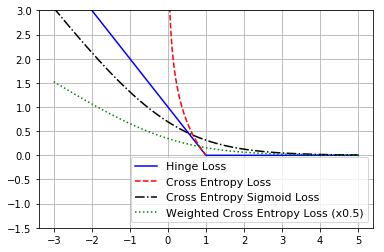

In [15]:
# 画出输出
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss')
plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-.', label='Cross Entropy Sigmoid Loss')
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Entropy Loss (x0.5)')
plt.ylim(-1.5, 3)
plt.legend(loc='lower right', prop={'size': 11})
plt.grid()
plt.show()

### Softmax熵和稀疏熵

因为很难画出多类损失函数，我们展示如何得到输出。

In [16]:
# Softmax熵损失函数
# L = -actual * (log(softmax(pred))) - (1-actual)(log(1-softmax(pred)))
unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=unscaled_logits,
                                                              labels=target_dist)
print(sess.run(softmax_xentropy))

# 稀疏熵损失函数
# 主要在类别和目标中有交互exclusive
# L = sum( -actual * log(pred) )
unscaled_logits = tf.constant([[1., -3., 10.]])
sparse_target_dist = tf.constant([2])
sparse_xentropy =  tf.nn.sparse_softmax_cross_entropy_with_logits(logits=unscaled_logits,
                                                                  labels=sparse_target_dist)
print(sess.run(sparse_xentropy))

[1.1601256]
[0.00012564]
